In [1]:
import os
import re
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#methods = ['ABC', 'GA', 'PSO', 'SA']
methods = ['2_iter', '5_iter', '10_iter']
#methods = ['2_iter']
Result_path = '/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/3_Make_New_Data_Predictor/ABC'

method_results = {}

for method in methods:
    print(f'{method} is processing')
    method_folder = os.path.join(Result_path, method)
    
    # 找出所有含有 "pred" 的 CSV 檔案
    pred_csv_files = glob.glob(os.path.join(method_folder, '*pred*.csv'))
    print(f'含有 "pred" 的 CSV 檔案：{pred_csv_files}')
    pd_df = pd.concat([pd.read_csv(f) for f in pred_csv_files])
    pd_df = pd_df[['crystal_size']]
    print(pd_df.shape)
    print(pd_df.columns)
    
    # 找出 "cycle{i}" 中 i 最大的檔案
    cycle_csv_files = glob.glob(os.path.join(method_folder, 'cycle*.csv'))
    max_i = max(int(re.search(r'cycle(\d+)', file).group(1)) for file in cycle_csv_files)
    max_cycle_file = f'cycle{max_i}.csv'
    print(f'"cycle i" 中 i 最大的檔案：{max_cycle_file}')
    gt_df = pd.read_csv(os.path.join(method_folder,max_cycle_file))
    gt_df = gt_df[['crystal_size']][-1* pd_df.shape[0]:]
    gt_df = gt_df[['crystal_size']].reset_index(drop=True)
    print(gt_df.shape)
    print(gt_df.columns)
    method_results[method] = (pd_df['crystal_size'], gt_df['crystal_size'])

2_iter is processing
含有 "pred" 的 CSV 檔案：['/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/3_Make_New_Data_Predictor/ABC/2_iter/cycle0_pred.csv', '/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/3_Make_New_Data_Predictor/ABC/2_iter/cycle1_pred.csv', '/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/3_Make_New_Data_Predictor/ABC/2_iter/cycle2_pred.csv', '/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/3_Make_New_Data_Predictor/ABC/2_iter/cycle3_pred.csv']
(200, 1)
Index(['crystal_size'], dtype='object')
"cycle i" 中 i 最大的檔案：cycle4.csv
(200, 1)
Index(['crystal_size'], dtype='object')
5_iter is processing
含有 "pred" 的 CSV 檔案：['/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/3_Make_New_Data_Predictor/ABC/5_iter/cycle0_pred.csv', '/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/3_Make_New_Data_Predictor/ABC/5_iter/cycle1_pred.csv', '/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/3_Make_New_Data_Predictor

98
104
108
[49.0, 52.0, 54.0]


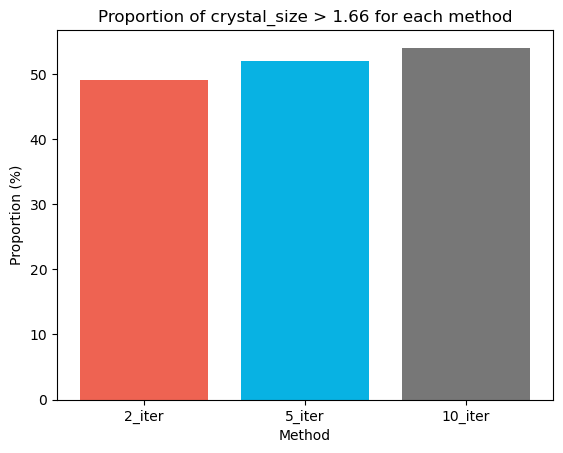

In [75]:

# 初始化一個空的字典來存儲每個方法的比例
proportions = {}

# 從 method_results 中取出每個方法的 gt_df['crystal_size']，並計算大於 1.66 的值的比例
for method, (pd_df_cs, gt_df_cs) in method_results.items():
    gt_df_gt_166 = gt_df_cs[gt_df_cs > 1.66]
    print(len(gt_df_gt_166))
    proportion = len(gt_df_gt_166) / len(gt_df_cs) * 100
    proportions[method] = proportion

# 繪製條形圖
methods = list(proportions.keys())
values = list(proportions.values())
print(values)
colors = ['#EE6352', '#08B2E3', '#777777', '#57A773']
plt.bar(methods, values, color=colors)

# 添加標題和軸標籤
plt.title('Proportion of crystal_size > 1.66 for each method')
plt.xlabel('Method')
plt.ylabel('Proportion (%)')

# 顯示圖表
plt.show()

0     2.864308
1     2.759194
2     2.290385
3     2.284641
4     2.267494
5     2.267303
6     2.185261
7     2.113017
8     2.093261
9     2.081892
10    2.009742
11    2.002599
12    1.849242
13    1.818080
14    1.810129
15    1.784453
16    1.783254
17    1.744413
18    1.691441
19    1.646461
20    1.610785
21    1.585672
22    1.567312
23    1.559384
24    1.464982
25    1.438992
26    1.404077
27    1.383401
28    1.378628
29    1.377720
30    1.372976
31    1.341353
32    1.253315
33    1.200902
34    1.188188
35    1.159246
36    1.136181
37    1.051306
38    1.044108
39    1.014607
40    0.986720
41    0.966002
42    0.945335
43    0.862690
44    0.820093
45    0.734998
46    0.702177
47    0.692747
48    0.659225
49    0.539729
Name: crystal_size, dtype: float64
50    2.509454
51    2.426251
52    2.335421
53    2.298167
54    2.235730
55    2.233831
56    2.159485
57    2.151175
58    2.149811
59    2.078785
60    2.069945
61    2.059582
62    2.046727
63    2.045727
64   

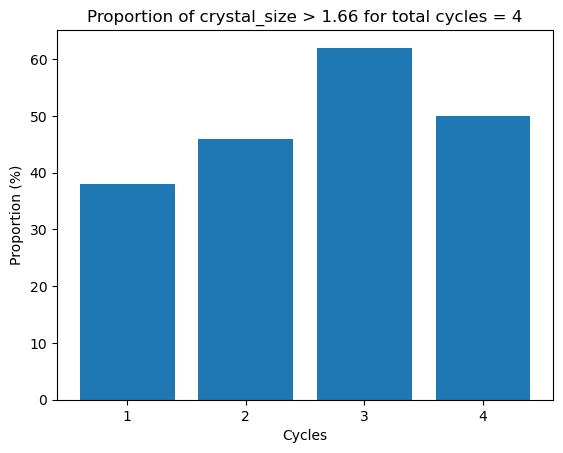

In [24]:

# 初始化一個空的字典來存儲每個方法的比例
proportions = {}


# 從 method_results 中取出每個方法的 gt_df['crystal_size']，並計算大於 1.66 的值的比例
for method, (pd_df_cs, gt_df_cs) in method_results.items():
    for iteration in range(0, 200, 50):
        gt_df_iter = gt_df_cs.iloc[iteration:iteration+50]
        print(gt_df_iter)
        gt_df_gt_166 = gt_df_iter[gt_df_iter > 1.66]
        proportion = len(gt_df_gt_166) / 50 * 100
        iterstr = str(int(iteration/50+1)) 
        proportions[iterstr] = proportion

# 繪製條形圖
iterstr = list(proportions.keys())
values = list(proportions.values())
#colors = ['#EE6352', '#08B2E3', '#777777', '#57A773']
plt.bar(iterstr, values) #color=colors)

# 添加標題和軸標籤
plt.title('Proportion of crystal_size > 1.66 for total cycles = 4')
plt.xlabel('Cycles')
plt.ylabel('Proportion (%)')

# 顯示圖表
plt.show()

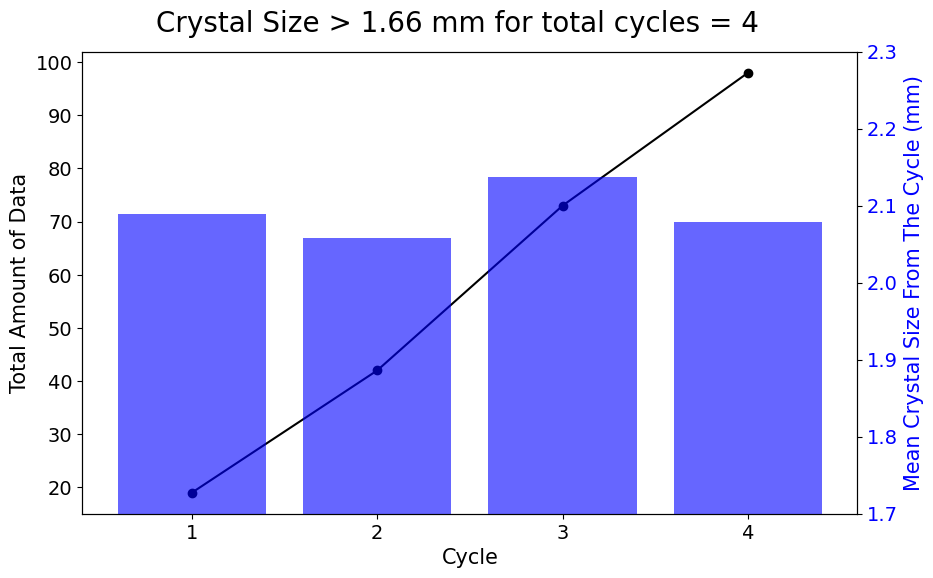

In [28]:
# evaluate mean

# 初始化一個空的字典來存儲每個方法的比例
proportions = {}
prop = {}

# 從 method_results 中取出每個方法的 gt_df['crystal_size']，並計算大於 1.66 的值的比例
for method, (pd_df_cs, gt_df_cs) in method_results.items():
    for iteration in range(0, 200, 50):
        gt_df_iter = gt_df_cs.iloc[iteration:iteration+50]
        gt_df_gt_166 = gt_df_iter[gt_df_iter > 1.66]
        #print(gt_df_gt_166)
        listddd = gt_df_gt_166.tolist()
        #print(listddd)
        mean = np.array(listddd).mean()
        #print(mean)
        iterstr = str(int(iteration/50+1)) 
        proportions[iterstr] = mean
        if len(list(prop.values()))>0:
            prop[iterstr] = len(listddd)+ list(prop.values())[-1]
        else:
            prop[iterstr] = len(listddd)
        
# 繪製條形圖
iterstr = list(proportions.keys())
values = list(proportions.values())
propp = list(prop.values())
#print(values)
#colors = ['#EE6352', '#08B2E3', '#777777', '#57A773']
# Set the y-axis lower bound

# 假設我們有兩個變數：左邊的變數和右邊的變數
left_variable = propp
right_variable = values

fig, ax1 = plt.subplots(figsize=(10, 6))

# 繪製左邊的變數（折線圖）
ax1.plot(iterstr, left_variable, 'black', marker='o', label='Total Amount of Data')
plt.xticks(fontsize=14)
ax1.set_xlabel('Cycle', fontsize=15)
ax1.set_ylabel('Total Amount of Data', color='black', fontsize=15)
ax1.tick_params(axis='y', labelcolor='black')
plt.yticks(fontsize=14)

# 創建一個共享 x 軸的右邊 y 軸（長條圖）
ax2 = ax1.twinx()
ax2.bar(iterstr, right_variable, color='blue', alpha=0.6, label='Mean Crystal Size From The Cycle (mm)')
ax2.set_ylabel('Mean Crystal Size From The Cycle (mm)', color='blue' , fontsize=15)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(bottom=1.7, top = 2.3) 

# 添加標題和圖例
fig.suptitle('Crystal Size > 1.66 mm for total cycles = 4', y=0.95, fontsize=20)
#ax1.legend(loc='upper left')
#x2.legend(loc='upper right')

#plt.rcParams.update({'font.size': 14}) 
# 顯示圖表


plt.yticks(fontsize=14)

plt.show()


0     2.864308
1     2.759194
2     2.290385
3     2.284641
4     2.267494
5     2.267303
6     2.185261
7     2.113017
8     2.093261
9     2.081892
10    2.009742
11    2.002599
12    1.849242
13    1.818080
14    1.810129
15    1.784453
16    1.783254
17    1.744413
18    1.691441
19    1.646461
20    1.610785
21    1.585672
22    1.567312
23    1.559384
24    1.464982
25    1.438992
26    1.404077
27    1.383401
28    1.378628
29    1.377720
30    1.372976
31    1.341353
32    1.253315
33    1.200902
34    1.188188
35    1.159246
36    1.136181
37    1.051306
38    1.044108
39    1.014607
40    0.986720
41    0.966002
42    0.945335
43    0.862690
44    0.820093
45    0.734998
46    0.702177
47    0.692747
48    0.659225
49    0.539729
Name: crystal_size, dtype: float64
[2.8643083600150336, 2.7591937914162417, 2.2903846985008456, 2.2846410578439764, 2.2674935017845788, 2.2673027896634417, 2.1852606475646312, 2.1130166486448543, 2.0932613665497573, 2.0818923880882823, 2.009741601164

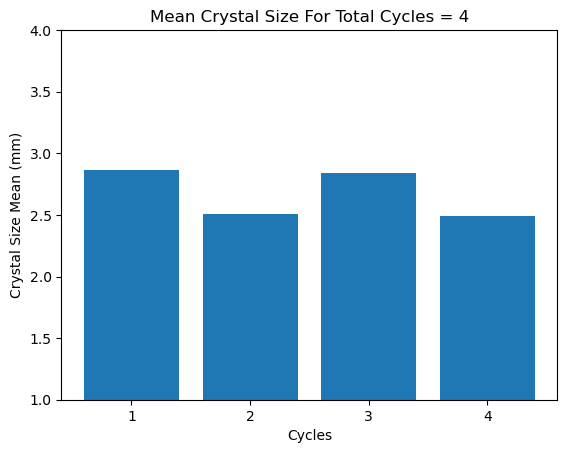

In [9]:
# determine the best in each cycle

# evaluate mean

# 初始化一個空的字典來存儲每個方法的比例
proportions = {}


# 從 method_results 中取出每個方法的 gt_df['crystal_size']，並計算大於 1.66 的值的比例
for method, (pd_df_cs, gt_df_cs) in method_results.items():
    for iteration in range(0, 200, 50):
        gt_df_iter = gt_df_cs.iloc[iteration:iteration+50]
        print(gt_df_iter)
        listddd = gt_df_iter.tolist()
        print(listddd)
        mean = np.array(listddd).max()
        print(mean)
        iterstr = str(int(iteration/50+1)) 
        proportions[iterstr] = mean

# 繪製條形圖
iterstr = list(proportions.keys())
values = list(proportions.values())
print(values)
#colors = ['#EE6352', '#08B2E3', '#777777', '#57A773']
# Set the y-axis lower bound
plt.ylim(bottom=1.0, top = 4.0)  # Set the lower bound to 1.0
plt.bar(iterstr, values) #color=colors)

# 添加標題和軸標籤
plt.title('Mean Crystal Size For Total Cycles = 4')
plt.xlabel('Cycles')
plt.ylabel('Crystal Size Mean (mm)')

# 顯示圖表
plt.show()

46
    5_iter_2
0   2.284156
1   2.261473
2   2.134327
3   1.975386
4   1.893187
5   1.836486
6   1.786529
7   1.712070
8   1.679936
9   1.669254
20  2.611532
21  2.051091
22  2.001983
23  1.906421
24  1.880330
25  1.861785
26  1.836018
40  2.598747
41  1.950088
42  1.937924
43  1.900151
44  1.850434
45  1.836089
46  1.790737
47  1.688323
60  2.240219
61  2.204207
62  2.196140
63  2.192716
64  2.094289
65  2.078636
66  2.039430
67  2.034896
68  2.022912
69  2.001237
70  1.848759
71  1.754481
72  1.672413
80  2.562214
81  2.394835
82  2.233639
83  2.217770
84  2.005626
85  2.000765
86  1.906663
87  1.858244
{'5_iter_2': 92.49454790980343}


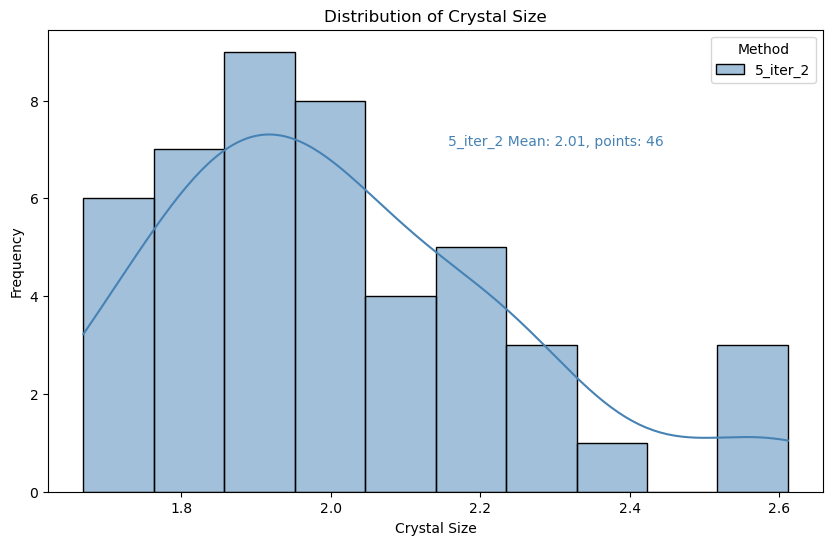

In [6]:
import seaborn as sns
# 初始化一個空的字典來存儲每個方法的比例
proportions = {}
gt_df = pd.DataFrame()
summ = {}
num = {}

# 從 method_results 中取出每個方法的 gt_df['crystal_size']，並計算大於 1.66 的值的比例
for method, (pd_df_cs, gt_df_cs) in method_results.items():
    gt_df_np = gt_df_cs[gt_df_cs> 1.66]
    print(len(gt_df_np))
    gt_df[method] = gt_df_np
    summ[method]   = gt_df_np.sum()
    num[method] = len(gt_df_np)

print(gt_df)
print(summ)
#colors = ['#808080', '#404040', '#000000']

# Define colors for the plot
colors = ['#4682B4', '#FF8C00', '#228B22'] 
# Plot the distribution of crystal size
plt.figure(figsize=(10, 6))

for method, color in zip(method_results.keys(), colors):
    sns.histplot(gt_df[method].dropna(), bins=10, kde=True, color=color, edgecolor='black', alpha=0.5, label=method)
    #plt.axvline(mean[method], color=color, linestyle='dashed', linewidth=1)
    #plt.text(mean[method]-0.2, plt.ylim()[1] * 0.9, f'{method}\nMean: {mean[method]:.2f}', color=color, ha='center')

# Add text annotations for the mean values on the right upper side
for i, (method, color) in enumerate(zip(method_results.keys(), colors)):
    plt.text(plt.xlim()[1] * 0.92, plt.ylim()[1] * (0.75 - i * 0.05), f'{method} Mean: {summ[method]/num[method]:.2f}, points: {num[method]}', color=color, ha='right')
    
plt.title('Distribution of Crystal Size')
plt.xlabel('Crystal Size')
plt.ylabel('Frequency')
plt.legend(title='Method')
plt.show()

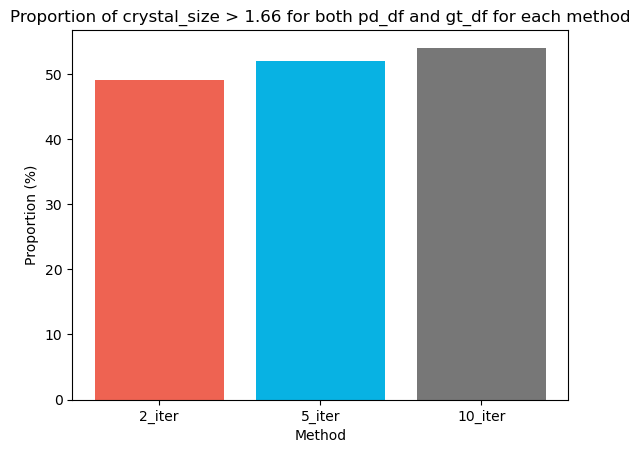

In [3]:
import matplotlib.pyplot as plt

# 初始化一個空的字典來存儲每個方法的比例
proportions = {}

# 從 method_results 中取出每個方法的 pd_df['crystal_size'] 和 gt_df['crystal_size']，並計算在同樣的 index 內，兩者都大於 1.87 的數據點的比例
for method, (pd_df_cs, gt_df_cs) in method_results.items():
    pd_df_cs = pd_df_cs.reset_index(drop=True)
    gt_df_cs = gt_df_cs.reset_index(drop=True)
    both_gt_187 = (pd_df_cs > 1.66) & (gt_df_cs > 1.66)
    # print(both_gt_187)
    proportion = both_gt_187.sum() / len(both_gt_187) * 100
    proportions[method] = proportion

# 繪製條形圖
methods = list(proportions.keys())
values = list(proportions.values())
colors = ['#EE6352', '#08B2E3', '#777777', '#57A773']
plt.bar(methods, values, color=colors)

# 添加標題和軸標籤
plt.title('Proportion of crystal_size > 1.66 for both pd_df and gt_df for each method')
plt.xlabel('Method')
plt.ylabel('Proportion (%)')

# 顯示圖表
plt.show()

0    2.208499
1    1.688732
2    1.686218
3    1.571126
4    1.534063
5    1.510147
6    0.994323
7    0.980575
8    0.943374
9    0.917741
Name: crystal_size, dtype: float64 0    1.929675
1    1.815329
2    1.739009
3    1.709269
4    1.202969
5    1.201963
6    1.098046
7    0.765797
8    0.681981
9    0.667085
Name: crystal_size, dtype: float64
10    1.819144
11    1.644877
12    1.644551
13    1.521709
14    1.513713
15    1.495758
16    1.121530
17    0.823189
18    0.758099
19    0.742528
Name: crystal_size, dtype: float64 0    2.016255
1    1.763929
2    1.732441
3    1.662298
4    1.487457
5    1.397890
6    1.369367
7    1.268406
8    1.194164
9    0.809441
Name: crystal_size, dtype: float64
20    2.011670
21    1.935555
22    1.906983
23    1.815941
24    1.747012
25    1.608903
26    1.374211
27    1.184758
28    1.048896
29    0.991845
Name: crystal_size, dtype: float64 0    1.803994
1    1.749444
2    1.640985
3    1.439716
4    1.373139
5    1.218141
6    1.110216
7    1.

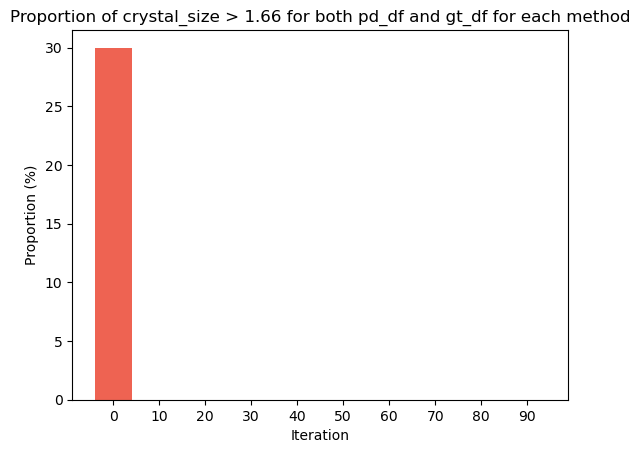

In [24]:
import matplotlib.pyplot as plt

# 初始化一個空的字典來存儲每個方法的比例
proportions = {}

# 從 method_results 中取出每個方法的 pd_df['crystal_size'] 和 gt_df['crystal_size']，並計算在同樣的 index 內，兩者都大於 1.87 的數據點的比例
for method, (pd_df_cs, gt_df_cs) in method_results.items():
    for iteration in range(0, 100, 10):
        gt_df_iter = gt_df_cs.iloc[iteration:iteration+10]
        pd_df_iter = pd_df_cs.iloc[iteration:iteration+10]
        
        print(gt_df_iter, pd_df_iter)
        
        both_gt_187 = (pd_df_iter > 1.66) & (gt_df_iter > 1.66)

        proportion = both_gt_187.sum() / 10 * 100
        iterstr = str(iteration) 
        proportions[iterstr] = proportion

# 繪製條形圖
methods = list(proportions.keys())
values = list(proportions.values())
colors = ['#EE6352', '#08B2E3', '#777777', '#57A773']
plt.bar(methods, values, color=colors)

# 添加標題和軸標籤
plt.title('Proportion of crystal_size > 1.66 for both pd_df and gt_df for each method')
plt.xlabel('Iteration')
plt.ylabel('Proportion (%)')

# 顯示圖表
plt.show()

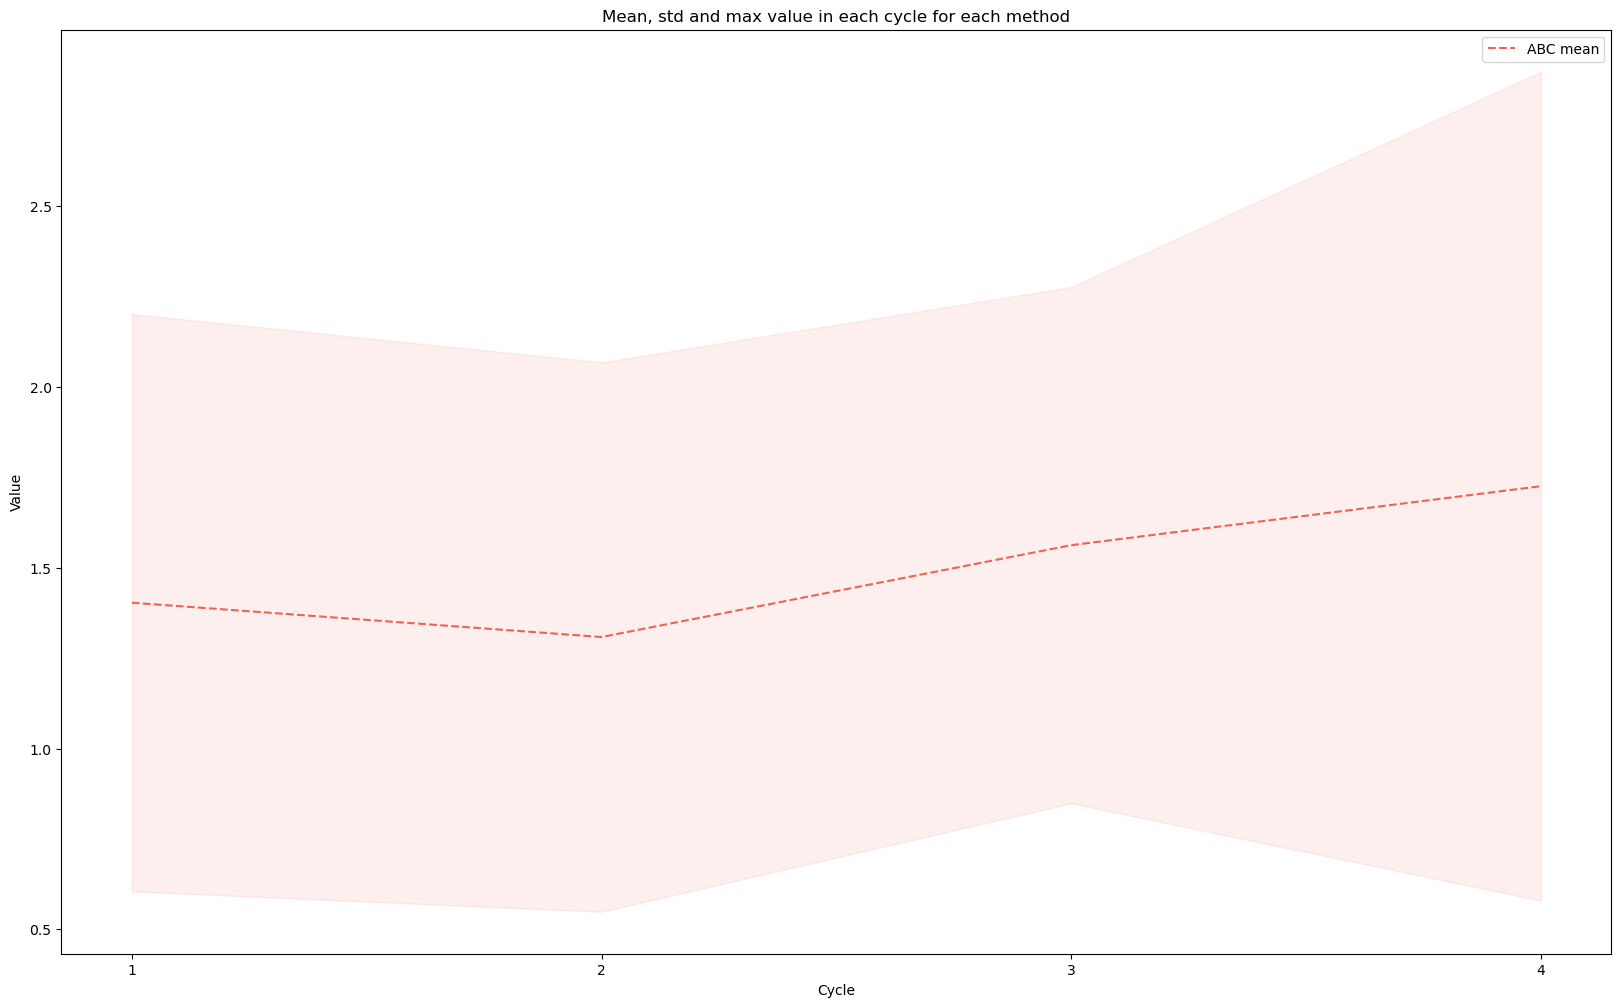

In [9]:
# 初始化兩個空的字典來存儲每個方法的平均值、標準差和最大值
mean_std_values = {}
max_values = {}

# 定義顏色
colors = ['#EE6352', '#08B2E3', '#777777', '#57A773']

# 設定圖表的大小
plt.figure(figsize=(20, 12))

# 從 method_results 中取出每個方法的 gt_df_cs，並找出每個 10 個元素區塊的平均值、標準差和最大值
for i, (method, (_, gt_df_cs)) in enumerate(method_results.items()):
    mean_std_values[method] = [(np.mean(gt_df_cs[i:i+10]), np.std(gt_df_cs[i:i+10])) for i in range(0, len(gt_df_cs), 10)]
    max_values[method] = np.maximum.accumulate([np.max(gt_df_cs[i:i+10]) for i in range(0, len(gt_df_cs), 10)])

# 繪製折線圖、誤差棒圖和最大值折線圖
for i, (method, values) in enumerate(mean_std_values.items()):
    mean_values = [value[0] for value in values]
    std_values = [value[1] for value in values]
    plt.plot(range(1, len(mean_values)+1), mean_values, label=method+' mean', linestyle='--', color=colors[i])  # 使用虛線來繪製平均值
    plt.fill_between(range(1, len(mean_values)+1), [mean - 1.96*std for mean, std in values], [mean + 1.96*std for mean, std in values], alpha=0.1, color=colors[i])
    # plt.plot(range(1, len(max_values[method])+1), max_values[method], label=method+' max', color=colors[i])  # 繪製最大值

# 添加標題和軸標籤
plt.title('Mean, std and max value in each cycle for each method')
plt.xlabel('Cycle')
plt.ylabel('Value')

# 設定 x 軸的間隔為 1
plt.xticks(np.arange(1, len(mean_values)+1, 1))

# 添加圖例
plt.legend()

# 顯示圖表
plt.show()